🔎 Data Overview
Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 Rows:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  Transaction

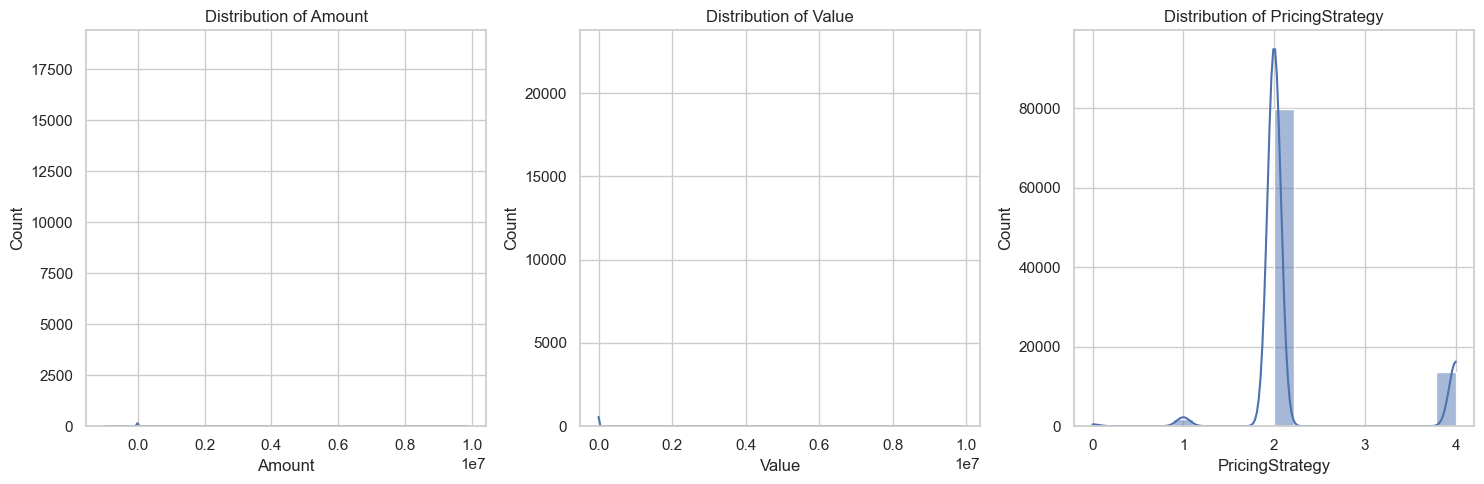

📊 Plotting distributions of categorical features...


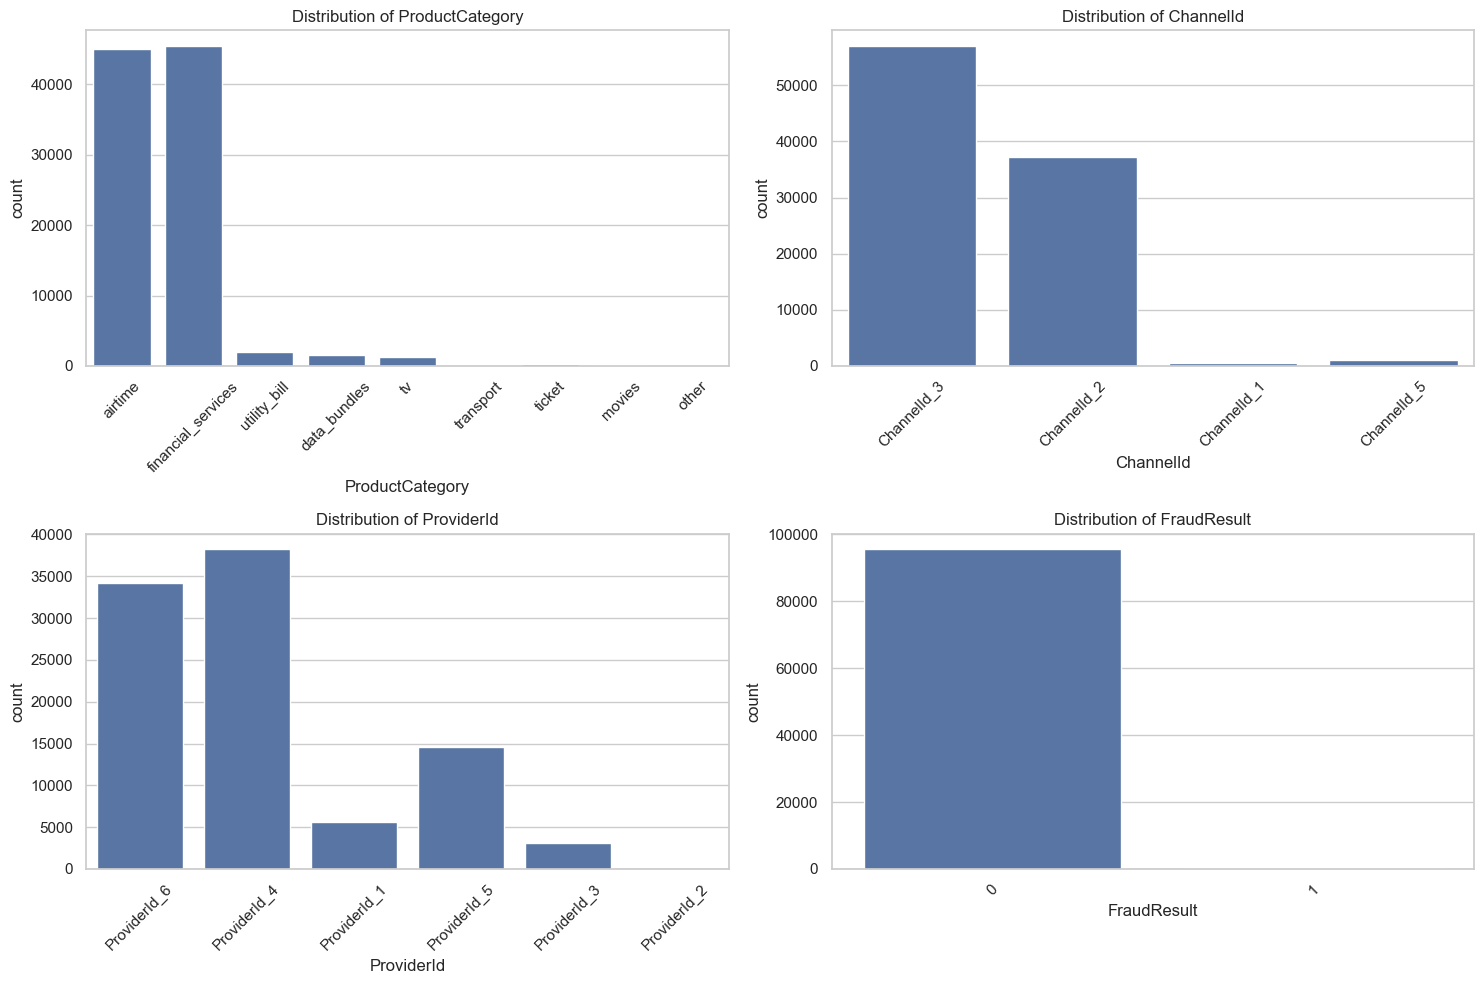

🔗 Correlation Matrix
                   Amount     Value  PricingStrategy  FraudResult
Amount           1.000000  0.989692        -0.061931     0.557370
Value            0.989692  1.000000        -0.017020     0.566739
PricingStrategy -0.061931 -0.017020         1.000000    -0.033821
FraudResult      0.557370  0.566739        -0.033821     1.000000


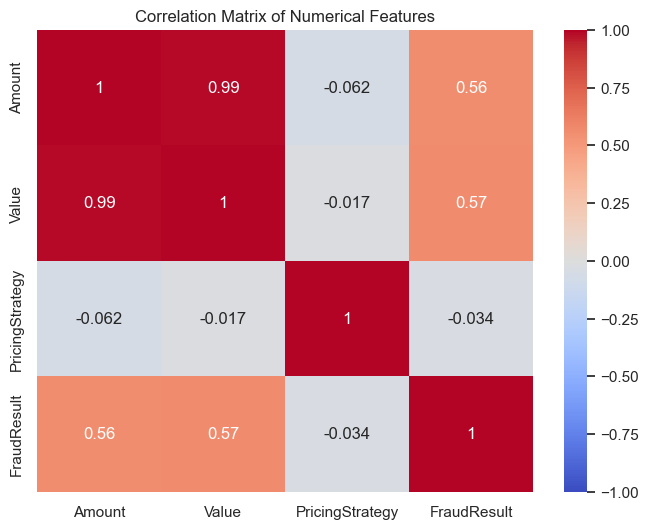

Missing Values:
 Series([], dtype: int64)
Dropped columns: CountryCode
Number of outliers flagged in Amount: 24441
Number of outliers flagged in Value: 9021
Number of outliers flagged in PricingStrategy: 15814
📊 Plotting boxplots for outlier visualization...


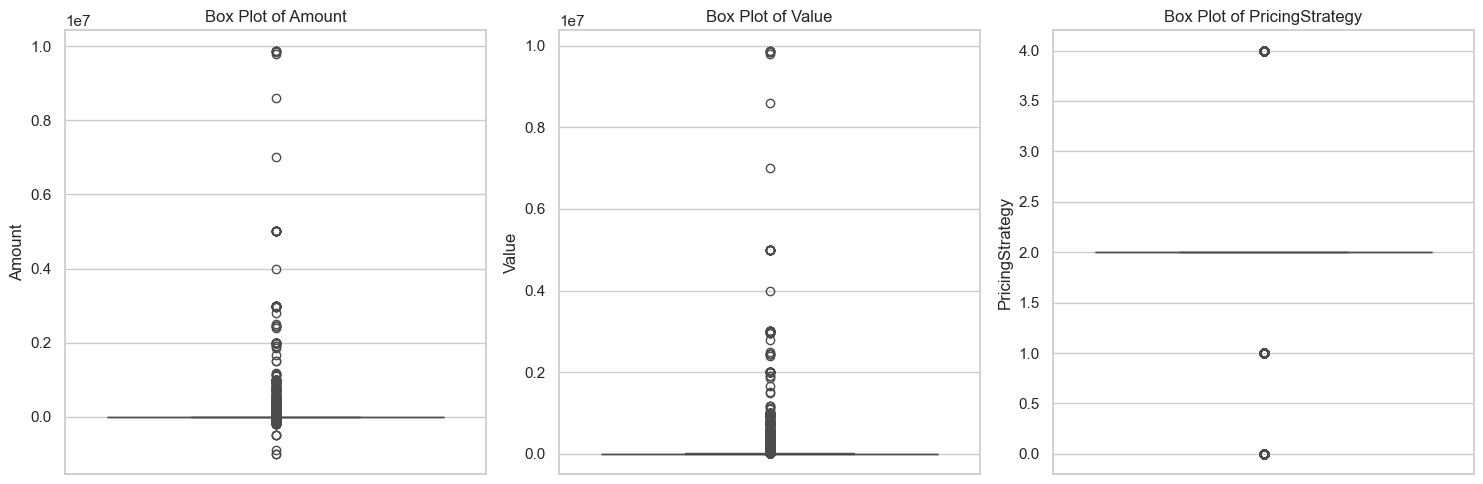

💾 Saved cleaned data to: data/processed/data_cleaned.csv


In [ ]:
# 1. Imports
import sys
sys.path.append("../src")
from data_processing import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots show in the notebook
%matplotlib inline

# Toggle: Set to False to enable full visualizations
FAST_MODE = False  

# Load data function
def load_data(path="../data/raw/data.csv"):
    return pd.read_csv(path)

# Load Data
df = load_data()

# Overview
overview(df)

# Summary Stats
summary_stats = summary_statistics(df)
print(summary_stats)

# Distribution of Numerical Features
if not FAST_MODE:
    print("📊 Plotting distributions of numerical features...")
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(['Amount', 'Value', 'PricingStrategy'], 1):
        plt.subplot(1, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Distribution of Categorical Features
if not FAST_MODE:
    categorical_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'FraudResult']
    print("📊 Plotting distributions of categorical features...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation Analysis
print("🔗 Correlation Matrix")
correlation_matrix = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr()
print(correlation_matrix)

if not FAST_MODE:
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

# Outlier Detection function
def add_outlier_flags(df):
    dropped_cols = []
    if 'CountryCode' in df.columns:
        df = df.drop(columns=['CountryCode'])
        dropped_cols.append('CountryCode')
    
    if dropped_cols:
        print(f"Dropped columns: {', '.join(dropped_cols)}")
    
    numeric_cols = ['Amount', 'Value', 'PricingStrategy']
    for col in numeric_cols:
        if col in df.columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            flag_col = f"{col}_outlier_flag"
            df[flag_col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

    return df

df = add_outlier_flags(df)

# Print outlier counts
numeric_cols = ['Amount', 'Value', 'PricingStrategy']
for col in numeric_cols:
    flag_col = f"{col}_outlier_flag"
    if flag_col in df.columns:
        count_outliers = df[flag_col].sum()
        print(f"Number of outliers flagged in {col}: {count_outliers}")

# Boxplots for Outliers
if not FAST_MODE:
    print("📊 Plotting boxplots for outlier visualization...")
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

# Save Cleaned Data

save_processed_data(df)
